In [1]:
# 출력을 원할경우 print() 함수 사용하기
# 실제 시험 환경에서 '테스트 케이스 추가' 이걸 실제로 꼭 돌려봐야 함 - 그 이유는 내가 실제로 출력을 한 값이 정답이 맞더라도 실제 채점 환경에서는 오답일 수 있음 : 결과적으로 테스트 케이스가 정상적으로 돌아가야 시험에 통과할 수 있다는 뜻 (코드 복사해서 돌려본 후 출력 값 살펴봐야 함)
# 실행 후 제출까지 꼭 !! 눌러줘야 함 !!

import pandas as pd

df = pd.read_csv("mtcars.csv")
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
mpg_mean = round(df['mpg'].mean()) # 대부분 문제를 정수형으로 출력하라고 함
print(mpg_mean)

20


In [ ]:
# 1 유형 예시 문제
## mpg 변수를 min-max scaling하고 0.5가 넘는 데이터 개수를 구하시오.
## gear가 3과 4인 자동차 그룹의 mpg 평균 값 차이를 절대값으로 구하시오.
## mpg 변수의 상자그림 기준으로 이상치의 개수를 구하시오.

### 1 유형 주의할 점
### 조건이 많기 때문에 문제를 잘 읽을 것
### 특히 날짜와 시간 데이터는 꼭 연습하기.

In [4]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("mtcars.csv")
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [10]:
# 데이터 프레임의 열별 타입을 보기 위해서는 dtypes를 사용하는데 () 붙이지 않는다.
df.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

In [18]:
# 열의 데이터 타입 변경
df2 = df.copy()
# df2['mpg'].astype('int') 이건 타입 변경 안됨 !!
df2 = df.astype({'mpg':'int'})
df2['disp'].astype('object')
print(df2.dtypes)

0     160.0
1     160.0
2     108.0
3     258.0
4     360.0
5     225.0
6     360.0
7     146.7
8     140.8
9     167.6
10    167.6
11    275.8
12    275.8
13    275.8
14    472.0
15    460.0
16    440.0
17     78.7
18     75.7
19     71.1
20    120.1
21    318.0
22    304.0
23    350.0
24    400.0
25     79.0
26    120.3
27     95.1
28    351.0
29    145.0
30    301.0
31    121.0
Name: disp, dtype: object
model     object
mpg        int64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object


In [20]:
# 데이터 타입 여러개 변경 (,로 연결)
df2 = df2.astype({'mpg':'float', 'disp':'object'})
df2.dtypes

model     object
mpg      float64
cyl        int64
disp      object
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

In [24]:
# 데이터프레임명['변수명'] 변수명에 해당하는 데이터프레임만 출력 가능
df['cyl'].value_counts()  # 변수명의 어떤 값들이 있는지 알아보기 위해 사용

cyl
8    14
4    11
6     7
Name: count, dtype: int64

In [29]:
print(df['mpg'].mean())  # 평균값
print(df['mpg'].median())  # 중앙값  = Q2 (quantile(.50))
print(df['cyl'].mode()[0])  # 최빈값 ** 특이하게 [0] 이렇게 인덱스로 가져와줘야 함

20.090625000000003
19.2
8
6.026948052089104
22.8


In [32]:
print(df['mpg'].var())  # 분산
print(df['mpg'].std())  # 표준편차
print(df['mpg'].quantile(0.25))  # 1분위 수 , IQR은 Q3 - Q1
print(df['mpg'].quantile(0.75))  # 3분위 수
print(df['mpg'].quantile(.75)-df['mpg'].quantile(.25))
print(df['mpg'].max() - df['mpg'].min())  # 범위 (max-min)

36.32410282258064
6.026948052089104
15.425
22.8
7.375
23.5


In [34]:
# 분포의 비대칭도 (왜도, 첨도)
mpg_skew = df['mpg'].skew()  # 왜도
print(mpg_skew)
mpg_kurt = df['mpg'].kurt()  # 첨도
print(mpg_kurt)

0.6723771376290805
-0.0220062914240855


In [38]:
print(df['mpg'].sum())
print(df['mpg'].quantile(.25)-df['mpg'].quantile(.75))
print(abs(df['mpg'].quantile(.25)-df['mpg'].quantile(.75)))

642.9000000000001
-7.375
7.375


In [39]:
# 데이터 수 (mpg라는 변수명의 데이터가 몇개냐)
len(df['mpg'])

32

In [40]:
# 그룹화하여 계산하기 (* groupby() 활용)
import seaborn as sns

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [43]:
# groupby는 그룹함수(mean(), sum())와 같이 써야 함 !! groupby만으로는 사용 안함
print(df.groupby('species').mean())  # species 라는 종 기준으로 평균 값 구하기
print(df.groupby('species').median())

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               5.0          3.4          1.50          0.2
versicolor           5.9          2.8          4.35          1.3
virginica            6.5          3.0          5.55          2.0


In [44]:
df = pd.read_csv('mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [47]:
# 행/열 인덱싱 : df.loc['행','열']
df.loc[3,'mpg']  # 3행의 mpg 값

21.4

In [57]:
df.loc[: ,'mpg':'wt'].head(3)

,mpg,cyl,disp,hp,drat,wt
0,21.0,6,160.0,110,3.90,2.620
1,21.0,6,160.0,110,3.90,2.875
2,22.8,4,108.0,93,3.85,2.320


In [58]:
df.loc[3:8,:]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [60]:
df.loc[:, ['mpg', 'wt']].head(3)

,mpg,wt
0,21.0,2.620
1,21.0,2.875
2,22.8,2.320


In [62]:
print(df.head(2))
print(df.tail(2))

           model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0      Mazda RX4  21.0    6  160.0  110   3.9  2.620  16.46   0   1     4   
1  Mazda RX4 Wag  21.0    6  160.0  110   3.9  2.875  17.02   0   1     4   

   carb  
0     4  
1     4  
            model   mpg  cyl   disp   hp  drat    wt  qsec  vs  am  gear  carb
30  Maserati Bora  15.0    8  301.0  335  3.54  3.57  14.6   0   1     5     8
31     Volvo 142E  21.4    4  121.0  109  4.11  2.78  18.6   1   1     4     2


In [63]:
df_cyl = df['cyl']
df_cyl.head()

0    6
1    6
2    4
3    6
4    8
Name: cyl, dtype: int64

In [64]:
df_new = df[['mpg','cyl']]
df_new.head(2)

,mpg,cyl
0,21.0,6
1,21.0,6


In [66]:
# 열 제거
df.drop(columns=['cyl', 'mpg']).head(3)

,model,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,108.0,93,3.85,2.320,18.61,1,1,4,1


In [67]:
# 열 추가
df2 = df.copy()
df2['new'] = df['mpg'] + 10
df2.head(3)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,new
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,31.0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,31.0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,32.8


In [74]:
cond1 = (df['cyl']==4)
# print(df[cond1].head(2))
df[df['cyl']==4]
# len(df[cond1])

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


In [80]:
cond1 = df['cyl']==4
cond2 = df['mpg']>20
df[cond1 & cond2].head(3)  # & / | 하나씩임 (and도 안되고 or도 안됨)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,Datsun 710,22.8,4,108.0,93,3.85,2.32,18.61,1,1,4,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.19,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.15,22.90,1,0,4,2


In [83]:
# 두 개 조건 필터링 후 데이터 개수
print(len(df[cond1 & cond2]))
print(len(df[cond1 | cond2]))

11
14


In [88]:
# 내림차순은 위에서부터 내려가는 것 = False (ascending은 오름차순)
df.sort_values('mpg', ascending=False).head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1


In [89]:
# 오름차순 : 위에서부터 올라감 (맨 위가 가장 작은 값)
df.sort_values('cyl', ascending=True).head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1


In [90]:
import numpy as np
df = pd.read_csv('mtcars.csv')
df.head(3)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [93]:
# hp 변수 값이 205 이상인 값은 205로 205 미만인 값은 이전 값 그대로
df['hp'] = np.where(df['hp']>=205, 205, df['hp'])
df.sort_values('hp', ascending=False).head(10)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
16,Chrysler Imperial,14.7,8,440.0,205,3.23,5.345,17.42,0,0,3,4
30,Maserati Bora,15.0,8,301.0,205,3.54,3.570,14.60,0,1,5,8
28,Ford Pantera L,15.8,8,351.0,205,4.22,3.170,14.50,0,1,5,4
6,Duster 360,14.3,8,360.0,205,3.21,3.570,15.84,0,0,3,4
23,Camaro Z28,13.3,8,350.0,205,3.73,3.840,15.41,0,0,3,4
15,Lincoln Continental,10.4,8,460.0,205,3.00,5.424,17.82,0,0,3,4
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3


In [94]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [95]:
df.shape  # 행, 열

(891, 15)

In [96]:
df.info()  # dataset의 정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [98]:
# 결측치 확인 및 처리
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [99]:
# 결측치
print(df.dropna(axis=0).shape)  # 행 기준 - 보통은 이걸 많이 씀 !!
print(df.dropna(axis=1).shape)  # 열 기준

(182, 15)
(891, 11)


In [105]:
df2 = df.copy()
# seaborn 데이터에서 가져올 때 DataFrame 형태로 바꿔줘야함!!
df2 = pd.DataFrame(df)
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [106]:
# 결측치 대체
median_age = df2['age'].median()
print(median_age)

28.0


In [107]:
df2['age'] = df['age'].fillna(median_age)  # 저장해줘야 함
df2.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [108]:
print(df['age'].mean())
print(df2['age'].mean())

29.69911764705882
29.36158249158249


In [110]:
# 중복 값 확인
df.drop_duplicates().shape

(784, 15)

<Axes: ylabel='age'>

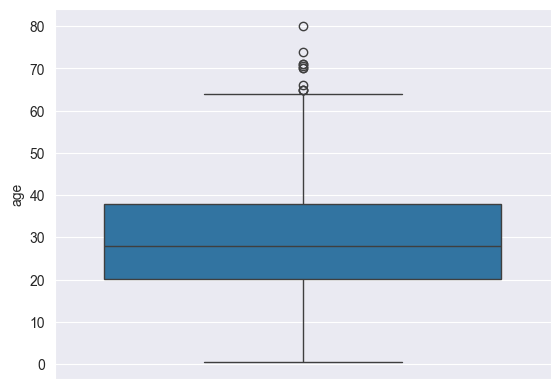

In [111]:
# 이상치 확인 및 처리
# 상자그림 활용 (이상치: Q1,Q3으로부터 1.5*IQR을 초과하는 값)
df = sns.load_dataset('titanic')

sns.boxplot(df['age'])

In [122]:
IQR = df['age'].quantile(0.75) - df['age'].quantile(0.25)
print(IQR)

17.875


In [123]:
upper = df['age'].quantile(0.75) + 1.5*IQR # (Q3 + 1.5 * IQR)
lower = df['age'].quantile(0.25) - 1.5*IQR # (Q1 - 1.5 * IQR)
print(upper, lower)

64.8125 -6.6875


In [132]:
# 문제: age 변수의 이상치를 제외한 데이터 수는?
cond1 = df['age'] <= upper
cond2 = df['age'] >= lower

# len(df[cond1 & cond2])
# 조건 두 개 이상일떼 조건 하나마다 괄호 꼭 써줘야 함
len(df[(df['age'] <= upper) & (df['age'] >= lower)])

703

In [133]:
# 문제2 : age 변수의 이상치를 제외한 데이터 셋 확인
df_new = df[cond1 & cond2]
df_new.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [134]:
# 표준 정규분포 활용 (이상치: +-3Z 값을 넘어가는 값)
# 데이터 표준화 : Z = (개별값 - 평균)/표준편차
mean_age = df['age'].mean()
std_age = df['age'].std()
print(mean_age, std_age)

29.69911764705882 14.526497332334042


In [135]:
znorm = (df['age'] - mean_age) / std_age
znorm

0     -0.530005
1      0.571430
2     -0.254646
3      0.364911
4      0.364911
         ...   
886   -0.185807
887   -0.736524
888         NaN
889   -0.254646
890    0.158392
Name: age, Length: 891, dtype: float64

In [136]:
# 문제3 : 이상치의 개수는 몇개인가? (+-3Z 기준)
cond1 = (znorm > 3)
len(df[cond1])

2

In [137]:
cond2 = (znorm < -3)
len(df[cond2])

0

In [138]:
print(len(df[cond1]) + len(df[cond2]))

2


In [3]:
# 중복 값 제거
import seaborn as sns
df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [140]:
# 주의: 예제에서는 중복값이 있어서 제거했지만,
# 중복값이 나올 수 있는 상황이면 제거할 필요 없음
# 아직 실기 1 유형에서는 중복값 제거하라는 문제 나온 적 없음!
df1 = df.copy()
df1 = df.drop_duplicates()
df1.shape

(784, 15)

In [5]:
import pandas as pd
df = pd.read_csv('mtcars.csv')

In [6]:
# 평균이 0, 표준편차가 1인 데이터 표준화
from sklearn.preprocessing import StandardScaler
zscaler = StandardScaler()
df['mpg'] = zscaler.fit_transform(df[['mpg']])
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,0.153299,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,0.153299,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,0.456737,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,0.220730,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,-0.234427,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [8]:
# print(df['mpg'].min())
# print(df['mpg'].max())
# print(df['mpg'].median())
print(df['mpg'].mean())  # 0이라고 결과값 나오지 않을 수 있음 = 0에 가까운
print(df['mpg'].std())

-1.6336103713847328
2.3279342893096193
-0.15013832823110304
-4.996003610813204e-16
1.016001016001524


In [12]:
# 데이터 정규화 - MinMaxScaler : 0 - 1 정규분포?
from sklearn.preprocessing import MinMaxScaler
mscaler = MinMaxScaler()
df['mpg'] = mscaler.fit_transform(df[['mpg']])
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,0.451064,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,0.451064,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,0.527660,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,0.468085,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,0.353191,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [14]:
print(df['mpg'].min())
print(df['mpg'].max())

0.0
1.0


In [16]:
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
df1 = df.loc[0:30, ]
df2 = df.loc[31:60, ]

In [19]:
df1.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
26,5.0,3.4,1.6,0.4,setosa
27,5.2,3.5,1.5,0.2,setosa
28,5.2,3.4,1.4,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa


In [20]:
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
31,5.4,3.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
34,4.9,3.1,1.5,0.2,setosa
35,5.0,3.2,1.2,0.2,setosa


In [23]:
df_sum = pd.concat([df1, df2], axis=0)  # 행방향으로 결합
print(df_sum.shape)

(61, 5)


In [24]:
df1 = df.loc[:, 'sepal_length':'sepal_width']
df2 = df.loc[:, 'petal_length':'species']

In [25]:
df1.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [26]:
df2.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [27]:
df_sum = pd.concat([df1, df2], axis=1)  # 열 방향으로 결합
print(df_sum.shape)

(150, 5)


In [ ]:
# 날짜 / 시간 데이터 / 인덱스 다루기

In [28]:
# 데이터 만들기
df = pd.DataFrame({
    '날짜': ['20230101', '20230101', '20230105', '20230105', '20230110', '20230110', '20230131', '20230131'],
    '물품': ['A', 'B', 'A', 'B', 'A', 'A', 'B', 'B'],
    '판매수': [5, 10, 15, 10, 5, 10, 15, 5],
    '개당수익': [500, 600, 700, 800, 900, 1000, 1100, 1200]
})
df

,날짜,물품,판매수,개당수익
0,20230101,A,5,500
1,20230101,B,10,600
2,20230105,A,15,700
3,20230105,B,10,800
4,20230110,A,5,900
5,20230110,A,10,1000
6,20230131,B,15,1100
7,20230131,B,5,1200


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      8 non-null      object
 1   물품      8 non-null      object
 2   판매수     8 non-null      int64 
 3   개당수익    8 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 384.0+ bytes


In [31]:
df['날짜'] = pd.to_datetime(df['날짜'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      8 non-null      datetime64[ns]
 1   물품      8 non-null      object        
 2   판매수     8 non-null      int64         
 3   개당수익    8 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 384.0+ bytes


In [32]:
# 년 월 일 변수 추가하기 (열)
df['year'] = df['날짜'].dt.year
df['month'] = df['날짜'].dt.month
df['day'] = df['날짜'].dt.day
df

,날짜,물품,판매수,개당수익,year,month,day
0,2023-01-01,A,5,500,2023,1,1
1,2023-01-01,B,10,600,2023,1,1
2,2023-01-05,A,15,700,2023,1,5
3,2023-01-05,B,10,800,2023,1,5
4,2023-01-10,A,5,900,2023,1,10
5,2023-01-10,A,10,1000,2023,1,10
6,2023-01-31,B,15,1100,2023,1,31
7,2023-01-31,B,5,1200,2023,1,31


In [37]:
# 날짜 구간 필터링 df[조건]
df[df['날짜'].between('2023-01-01', '2023-01-10')]

,날짜,물품,판매수,개당수익,year,month,day
0,2023-01-01,A,5,500,2023,1,1
1,2023-01-01,B,10,600,2023,1,1
2,2023-01-05,A,15,700,2023,1,5
3,2023-01-05,B,10,800,2023,1,5
4,2023-01-10,A,5,900,2023,1,10
5,2023-01-10,A,10,1000,2023,1,10


In [39]:
# 날짜를 인덱스로 설정 후 loc 함수 사용
# 데이터 만들기
df = pd.DataFrame({
    '날짜': ['20230101', '20230101', '20230105', '20230105', '20230110', '20230110', '20230131', '20230131'],
    '물품': ['A', 'B', 'A', 'B', 'A', 'A', 'B', 'B'],
    '판매수': [5, 10, 15, 10, 5, 10, 15, 5],
    '개당수익': [500, 600, 700, 800, 900, 1000, 1100, 1200]
})
df['날짜'] = pd.to_datetime(df['날짜'])

df = df.set_index(df['날짜'])
# 옵션으로 drop=True (변수에서는 날아가고, 인덱스에만 있음)
# False일 경우 변수에서도 살아있음 = default
df

,날짜,물품,판매수,개당수익
날짜,,,,
2023-01-01,2023-01-01,A,5,500
2023-01-01,2023-01-01,B,10,600
2023-01-05,2023-01-05,A,15,700
2023-01-05,2023-01-05,B,10,800
2023-01-10,2023-01-10,A,5,900
2023-01-10,2023-01-10,A,10,1000
2023-01-31,2023-01-31,B,15,1100
2023-01-31,2023-01-31,B,5,1200


In [41]:
print(df.loc['2023-01-01': '2023-01-10'])  # loc는 항상 기간 포함

                   날짜 물품  판매수  개당수익
날짜                                 
2023-01-01 2023-01-01  A    5   500
2023-01-01 2023-01-01  B   10   600
2023-01-05 2023-01-05  A   15   700
2023-01-05 2023-01-05  B   10   800
2023-01-10 2023-01-10  A    5   900
2023-01-10 2023-01-10  A   10  1000


In [43]:
print(df.loc[(df.index >= '2023-01-05') & (df.index <= '2023-01-10')])

                   날짜 물품  판매수  개당수익
날짜                                 
2023-01-05 2023-01-05  A   15   700
2023-01-05 2023-01-05  B   10   800
2023-01-10 2023-01-10  A    5   900
2023-01-10 2023-01-10  A   10  1000


In [65]:
# 시간 다루기
# 시간 데이터 만들기
df = pd.DataFrame( {
    '물품': ['A', 'B', 'A', 'B', 'A', 'A', 'B', 'B'],
    '판매수': [11, 12, 34, 13, 15, 16, 16, 17],
    '개당수익': ['900', '1000', '11000', '1000', '200', '3000', '100', '1000']
})
time = pd.date_range('2023-09-24 12:25:00', '2023-09-25 14:45:30', periods=8)
df['time'] = time
df = df[['time', '물품', '판매수', '개당수익']]
df

,time,물품,판매수,개당수익
0,2023-09-24 12:25:00.000000000,A,11,900
1,2023-09-24 16:10:47.142857142,B,12,1000
2,2023-09-24 19:56:34.285714285,A,34,11000
3,2023-09-24 23:42:21.428571428,B,13,1000
4,2023-09-25 03:28:08.571428571,A,15,200
5,2023-09-25 07:13:55.714285714,A,16,3000
6,2023-09-25 10:59:42.857142857,B,16,100
7,2023-09-25 14:45:30.000000000,B,17,1000


In [66]:
# index 초기화 (인덱스를 컬럼으로)
df = df.set_index('time')
df

,물품,판매수,개당수익
time,,,
2023-09-24 12:25:00.000000000,A,11,900
2023-09-24 16:10:47.142857142,B,12,1000
2023-09-24 19:56:34.285714285,A,34,11000
2023-09-24 23:42:21.428571428,B,13,1000
2023-09-25 03:28:08.571428571,A,15,200
2023-09-25 07:13:55.714285714,A,16,3000
2023-09-25 10:59:42.857142857,B,16,100
2023-09-25 14:45:30.000000000,B,17,1000


In [61]:
df = df.reset_index()
df

,time,물품,판매수,개당수익
0,2023-09-24 12:25:00.000000000,A,11,900
1,2023-09-24 16:10:47.142857142,B,12,1000
2,2023-09-24 19:56:34.285714285,A,34,11000
3,2023-09-24 23:42:21.428571428,B,13,1000
4,2023-09-25 03:28:08.571428571,A,15,200
5,2023-09-25 07:13:55.714285714,A,16,3000
6,2023-09-25 10:59:42.857142857,B,16,100
7,2023-09-25 14:45:30.000000000,B,17,1000


In [67]:
# 시간 데이터 다루기  (주의, 시간이 index에 위치해야 함) - loc로 다룰 수 있음
df.between_time(start_time='12:25', end_time='21:00')
# 시작 시간, 끝 시간 모두 포함
# include_start=False, include_end=False 옵션으로 시작, 끝 시간 제외 가능

,물품,판매수,개당수익
time,,,
2023-09-24 12:25:00.000000000,A,11,900
2023-09-24 16:10:47.142857142,B,12,1000
2023-09-24 19:56:34.285714285,A,34,11000
2023-09-25 14:45:30.000000000,B,17,1000


In [68]:
# 날짜 / 시간 같이 필터링
print(df.loc['2023-09-24 12:25:00':'2023-09-24 21:11:50'])
print(df.loc[(df.index >= '2023-09-24 12:25:00') & (df.index <= '2023-09-24 21:11:50')])

                              물품  판매수   개당수익
time                                        
2023-09-24 12:25:00.000000000  A   11    900
2023-09-24 16:10:47.142857142  B   12   1000
2023-09-24 19:56:34.285714285  A   34  11000
                              물품  판매수   개당수익
time                                        
2023-09-24 12:25:00.000000000  A   11    900
2023-09-24 16:10:47.142857142  B   12   1000
2023-09-24 19:56:34.285714285  A   34  11000
